In [2]:
# Importamos la librería pandas y optbinning
import pandas as pd
from sklearn.model_selection import train_test_split
from optbinning import Scorecard, BinningProcess, OptimalBinning

# Imnportamos el conjunto de daros "germacredit"
dt=pd.read_csv('germancredit.csv')
dt.head()

,Unnamed: 0,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : divorced/separated,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,male : divorced/separated,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good
3,3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,good
4,4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : divorced/separated,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,bad


Elimino la primera columna que no me aporta nada

In [3]:
dt.columns

Index(['Unnamed: 0', 'status.of.existing.checking.account',
       'duration.in.month', 'credit.history', 'purpose', 'credit.amount',
       'savings.account.and.bonds', 'present.employment.since',
       'installment.rate.in.percentage.of.disposable.income',
       'personal.status.and.sex', 'other.debtors.or.guarantors',
       'present.residence.since', 'property', 'age.in.years',
       'other.installment.plans', 'housing',
       'number.of.existing.credits.at.this.bank', 'job',
       'number.of.people.being.liable.to.provide.maintenance.for', 'telephone',
       'foreign.worker', 'creditability'],
      dtype='object')

In [4]:
dt.drop(['Unnamed: 0'], axis= 1)

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : divorced/separated,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,male : divorced/separated,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,good
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : divorced/separated,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,... < 100 DM,4 <= ... < 7 years,3,male : married/widowed,none,...,real estate,31,none,own,1,unskilled - resident,1,none,yes,good
996,... < 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : married/widowed,none,...,building society savings agreement/ life insur...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes,good
997,no checking account,12,existing credits paid back duly till now,radio/television,804,... < 100 DM,... >= 7 years,4,male : married/widowed,none,...,"car or other, not in attribute Savings account...",38,none,own,1,skilled employee / official,1,none,yes,good
998,... < 0 DM,45,existing credits paid back duly till now,radio/television,1845,... < 100 DM,1 <= ... < 4 years,4,male : married/widowed,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,bad


# Recodifico esta variable creditability (variable objetivo) para que sea binaria

In [5]:
dt["y"]=0
dt.loc[dt["creditability"]=="good",["y"]]=0
dt.loc[dt["creditability"]=="bad", ["y"]]=1
dt.drop(labels='creditability',inplace=True, axis=1)

# Creo la muestra de entrenamiento y de test

In [6]:
dt_train, dt_test = train_test_split(dt, stratify= dt["y"], test_size=.25, random_state=1234)

# Realizamos la trimificación optima de age.in.years

In [8]:
variable="age.in.years"
X=dt_train[variable].values
Y=dt_train['y'].values
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [9]:
optb.fit(X, Y)
optb.splits
binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 25.50)",139,0.185333,81,58,0.417266,-0.513292,0.053122,0.006568
1,"[25.50, 29.50)",146,0.194667,100,46,0.315068,-0.070769,0.000989,0.000124
2,"[29.50, 34.50)",137,0.182667,94,43,0.313869,-0.065203,0.000787,0.000098
3,"[34.50, 36.50)",61,0.081333,51,10,0.163934,0.781943,0.041207,0.005024
4,"[36.50, 38.50)",38,0.050667,30,8,0.210526,0.474458,0.010242,0.001268
5,"[38.50, 41.50)",46,0.061333,35,11,0.239130,0.310155,0.005514,0.000686
6,"[41.50, inf)",183,0.244000,134,49,0.267760,0.158722,0.005946,0.000742
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,750,1.000000,525,225,0.300000,,0.117806,0.014511


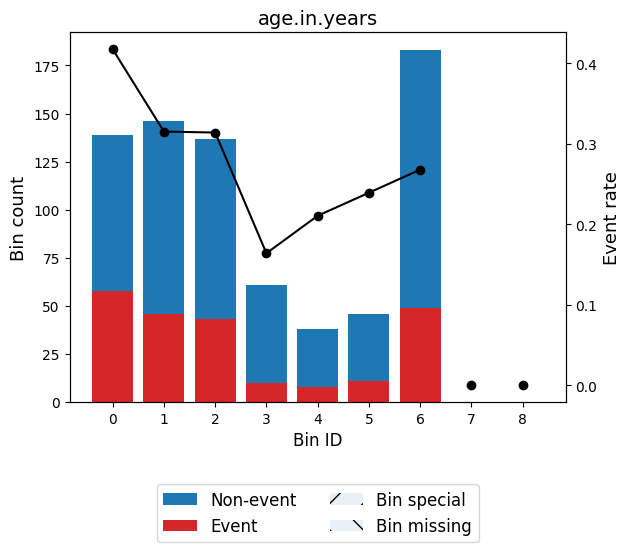

In [10]:
binning_table.plot(metric="event_rate")

In [11]:
optb.splits

array([25.5, 29.5, 34.5, 36.5, 38.5, 41.5])

In [12]:
print("IV= ", binning_table.iv.round(3))
print("Gini= ", binning_table.gini.round(3))

IV=  0.118
Gini=  0.182
